## Step 5 --- Train/Test Split

In [1]:
#Importing all the necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df= pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\LuxDev DSA\Capstone-Project\Crypto-BuySell-Model\data\processed\BTCUSDT_1dmodified.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open_time           1000 non-null   object 
 1   open                1000 non-null   float64
 2   high                1000 non-null   float64
 3   low                 1000 non-null   float64
 4   close               1000 non-null   float64
 5   volume              1000 non-null   float64
 6   close_time          1000 non-null   object 
 7   quote_asset_volume  1000 non-null   float64
 8   num_trades          1000 non-null   float64
 9   taker_base_volume   1000 non-null   float64
 10  taker_quote_volume  1000 non-null   float64
 11  return_1d           999 non-null    float64
 12  return_7d           993 non-null    float64
 13  rolling_volatility  993 non-null    float64
 14  rsi                 987 non-null    float64
 15  sma_20              981 non-null    float64
 16  sma_50 

In [3]:
# Check for NaN values
print(f"NaN values before cleaning:\n{df.isna().sum()}")

# Drop NaN rows
df_clean = df.dropna()

print(f"\nOriginal data: {len(df)} rows")
print(f"After dropping NaN: {len(df_clean)} rows")

NaN values before cleaning:
open_time               0
open                    0
high                    0
low                     0
close                   0
volume                  0
close_time              0
quote_asset_volume      0
num_trades              0
taker_base_volume       0
taker_quote_volume      0
return_1d               1
return_7d               7
rolling_volatility      7
rsi                    13
sma_20                 19
sma_50                 49
sma_200               199
bb_upper               19
bb_middle              19
bb_lower               19
macd                   25
macd_signal            33
macd_histogram         33
stoch_k                13
stoch_d                15
future_return           1
label                   0
dtype: int64

Original data: 1000 rows
After dropping NaN: 800 rows


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open_time           1000 non-null   object 
 1   open                1000 non-null   float64
 2   high                1000 non-null   float64
 3   low                 1000 non-null   float64
 4   close               1000 non-null   float64
 5   volume              1000 non-null   float64
 6   close_time          1000 non-null   object 
 7   quote_asset_volume  1000 non-null   float64
 8   num_trades          1000 non-null   float64
 9   taker_base_volume   1000 non-null   float64
 10  taker_quote_volume  1000 non-null   float64
 11  return_1d           999 non-null    float64
 12  return_7d           993 non-null    float64
 13  rolling_volatility  993 non-null    float64
 14  rsi                 987 non-null    float64
 15  sma_20              981 non-null    float64
 16  sma_50 

In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 199 to 998
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open_time           800 non-null    object 
 1   open                800 non-null    float64
 2   high                800 non-null    float64
 3   low                 800 non-null    float64
 4   close               800 non-null    float64
 5   volume              800 non-null    float64
 6   close_time          800 non-null    object 
 7   quote_asset_volume  800 non-null    float64
 8   num_trades          800 non-null    float64
 9   taker_base_volume   800 non-null    float64
 10  taker_quote_volume  800 non-null    float64
 11  return_1d           800 non-null    float64
 12  return_7d           800 non-null    float64
 13  rolling_volatility  800 non-null    float64
 14  rsi                 800 non-null    float64
 15  sma_20              800 non-null    float64
 16  sma_50     

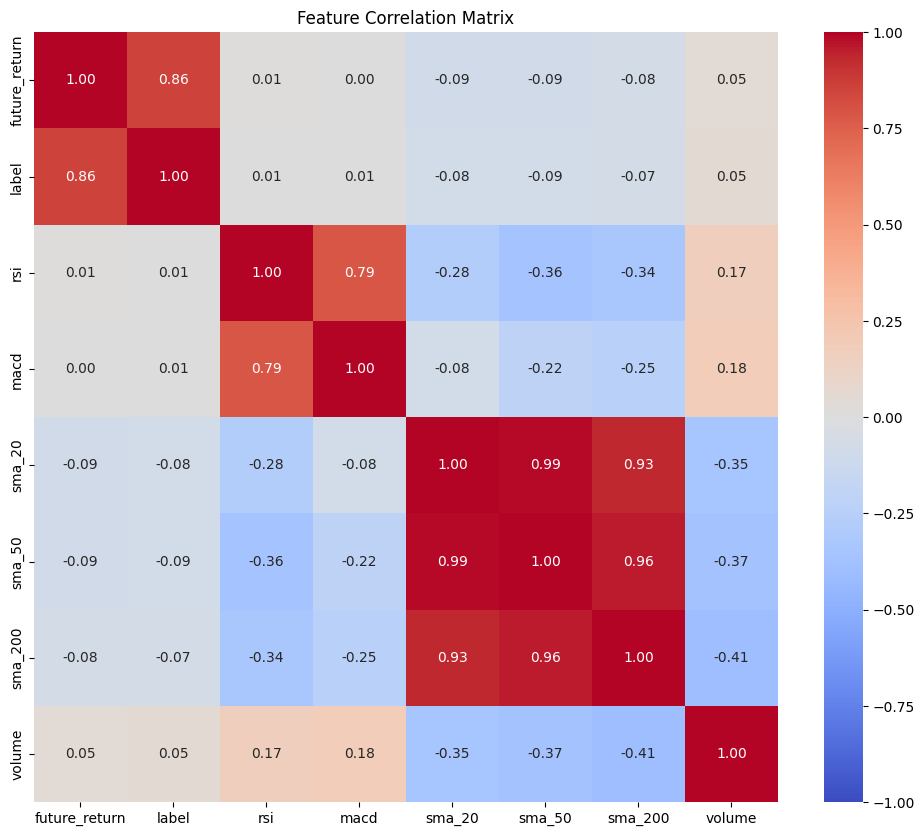

In [6]:
#Plotting a Feature Correlation Matrix to determine what columns to use for the model
numeric_cols = [
    'future_return', 'label', 'rsi', 'macd', 'macd_hist',
    'sma_20', 'sma_50', 'sma_200', 'volatility', 'volume'
]

# Filter columns that actually exist in your dataframe
existing_cols = [col for col in numeric_cols if col in df_clean.columns]

plt.figure(figsize=(12, 10))
sns.heatmap(df_clean[existing_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

In [7]:
#Define features and target

target_col = "label"  #column with your Buy/Sell/Hold labels
feature_cols = df_clean.columns.difference([target_col, "future_return", "open_time", "close_time"])

X = df_clean[feature_cols]
y = df_clean[target_col]


#Train/Validation/Test split

train_size = int(len(df_clean) * 0.70)
val_size = int(len(df_clean) * 0.15)
test_start = train_size + val_size

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_val = X.iloc[train_size:test_start]
y_val = y.iloc[train_size:test_start]

X_test = X.iloc[test_start:]
y_test = y.iloc[test_start:]


#Print summary

print(f"Train: {len(X_train)} samples ({len(X_train)/len(df)*100:.1f}%)")
print(f"Validation: {len(X_val)} samples ({len(X_val)/len(df)*100:.1f}%)")
print(f"Test: {len(X_test)} samples ({len(X_test)/len(df)*100:.1f}%)")

Train: 560 samples (56.0%)
Validation: 120 samples (12.0%)
Test: 120 samples (12.0%)


## Step 6 --- Model Training

In [ ]:
#Importing all the necessary libraries
import xgboost
import tensorflow
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
#CatBoost model
model_cat = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    random_seed=42,
    verbose=0  #
)

#Train
model_cat.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

#Predict
y_val_pred = model_cat.predict(X_val)

#Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, digits=4))

Confusion Matrix:
[[ 0  8  0]
 [ 0 95  0]
 [ 0 17  0]]

Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         8
           1     0.7917    1.0000    0.8837        95
           2     0.0000    0.0000    0.0000        17

    accuracy                         0.7917       120
   macro avg     0.2639    0.3333    0.2946       120
weighted avg     0.6267    0.7917    0.6996       120



C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classif